In [48]:
import pandas as pd
file_path = r'C:\Users\vinay\Downloads\CAR_DETAILS.csv'
df = pd.read_csv(file_path)
# df = pd.read_csv('CARDETAILS.csv')


Data Cleaning and Preprocessing

Handling mIssing VAlues

In [49]:
# Fill missing values for numeric columns
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill missing values for categorical columns
df.fillna('Unknown', inplace=True)


Check data types and encode categorical features using One-Hot Encoding.

In [50]:
print(df.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [51]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type'], drop_first=True)


Scale numeric columns (e.g., price, mileage) using StandardScaler.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])



3. Exploratory Data Analysis (EDA)

In [53]:
print(df.describe())
print(df.info())


              year  selling_price     km_driven
count  4340.000000   4.340000e+03  4.340000e+03
mean   2013.090783  -4.747866e-17 -6.548781e-18
std       4.215344   1.000115e+00  1.000115e+00
min    1992.000000  -8.368925e-01 -1.419738e+00
25%    2011.000000  -5.106080e-01 -6.693102e-01
50%    2014.000000  -2.664340e-01 -1.332750e-01
75%    2016.000000   1.657315e-01  5.099672e-01
max    2020.000000   1.451363e+01  1.587486e+01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4340 non-null   object 
 1   year                          4340 non-null   int64  
 2   selling_price                 4340 non-null   float64
 3   km_driven                     4340 non-null   float64
 4   transmission                  4340 non-null   object 
 5   owner                         4340 non-null

Create visualizations with Matplotlib and Seaborn:

Generate descriptive statistics for the dataset:

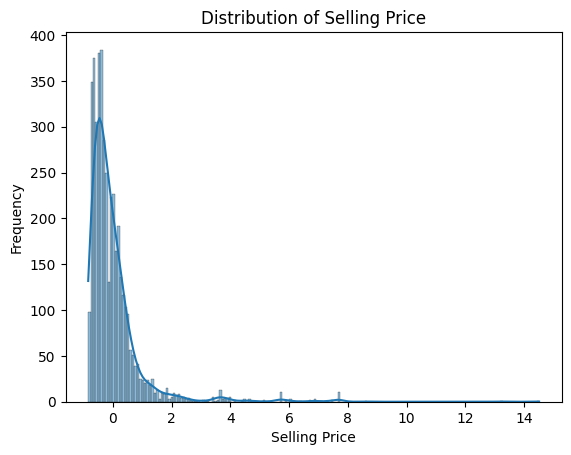

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['selling_price'], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()



Create visualizations with Matplotlib and Seaborn:

 Scatter plot of Price vs. Mileage:

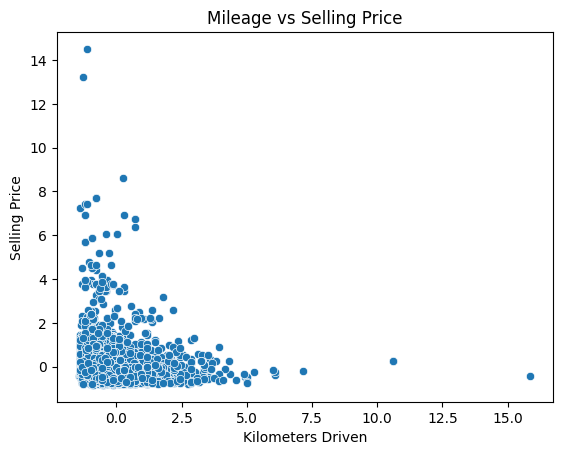

In [55]:
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title("Mileage vs Selling Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()


Correlation heatmap:

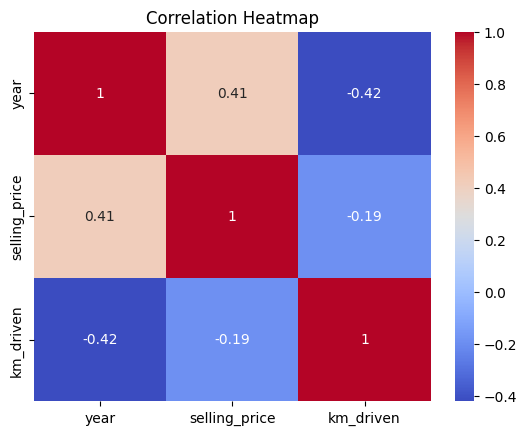

In [56]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Select numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

1. Data Preprocessing

Handling Missing Values

In [57]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for categorical columns with 'Unknown'
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Verify the result
print(df.isnull().sum())  # Check if there are any missing values left


name                            0
year                            0
selling_price                   0
km_driven                       0
transmission                    0
owner                           0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
dtype: int64


1. Feature and Target Variable Setup

In [58]:
# Feature variables (excluding the target 'selling_price')
X = df.drop('selling_price', axis=1)

# Target variable (the price)
y = df['selling_price']

 Splitting the Data into Training and Testing Sets

 Initialize and Train Models:

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'df' is already loaded
# For demonstration, using 'df' as your DataFrame. You should replace it with your actual dataset.

# Check for missing values and handle them
print("Missing values before handling:")
print(df.isnull().sum())

# Since there are no missing values, we do not need to fill them
# If there were missing values, you could fill them using the previous code

# If you have categorical features, you need to encode them.
# Using LabelEncoder to convert categorical variables to numerical values.
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns (for example: 'name', 'owner', etc.)
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split the data into feature variables (X) and target variable (y)
X = df.drop('selling_price', axis=1)  # Assuming 'selling_price' is the target variable
y = df['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf')  # You can specify 'linear', 'poly', or 'rbf' kernel
}

# Initialize dictionary to store results
model_results = {}

# Loop through models, train them and evaluate
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    model_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Print the results for each model
for name, metrics in model_results.items():
    print(f"{name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}, R2: {metrics['R2']}")


Missing values before handling:
name                            0
year                            0
selling_price                   0
km_driven                       0
transmission                    0
owner                           0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
dtype: int64
Linear Regression - MAE: 0.3830986948433521, MSE: 0.5434574238138619, RMSE: 0.7371956482602579, R2: 0.4040592270382757
Decision Tree - MAE: 0.20905435635281253, MSE: 0.41622491351429014, RMSE: 0.6451549531037409, R2: 0.5435789708328831
Random Forest - MAE: 0.18477423479445235, MSE: 0.27149754343093424, RMSE: 0.5210542615034774, R2: 0.7022831066434071
Support Vector Regressor - MAE: 0.27401034112739686, MSE: 0.4272343412805032, RMSE: 0.6536316556597479, R2: 0.5315063288827191


Visualizing Model Performance

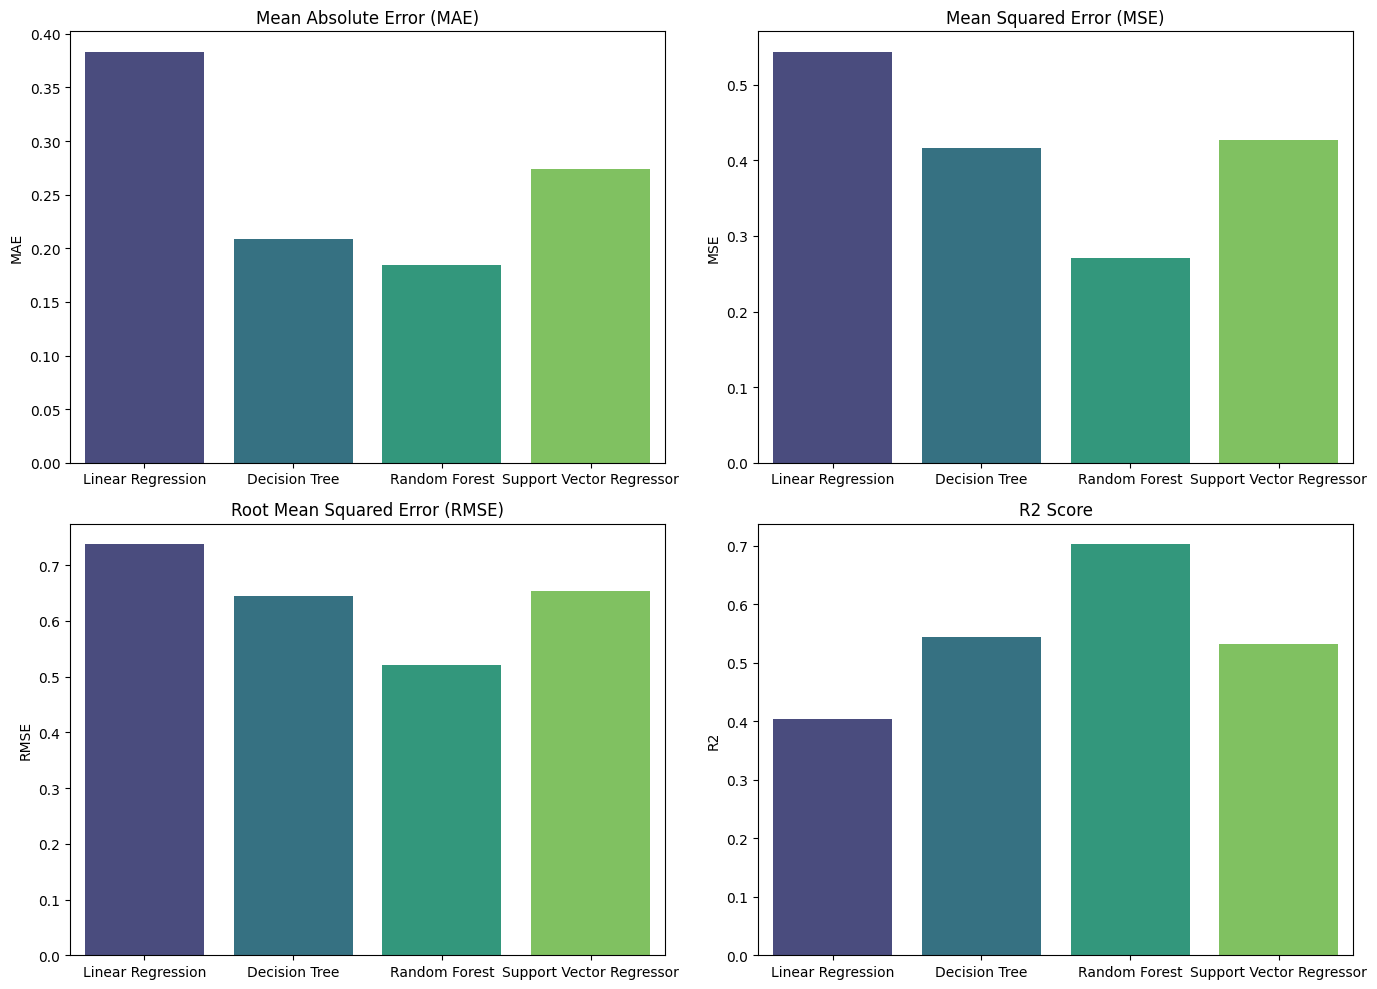

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists for plotting
model_names = []
mae_values = []
mse_values = []
rmse_values = []
r2_values = []

# Collect the metrics from the results
for name, metrics in model_results.items():
    model_names.append(name)
    mae_values.append(metrics['MAE'])
    mse_values.append(metrics['MSE'])
    rmse_values.append(metrics['RMSE'])
    r2_values.append(metrics['R2'])

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE Bar Plot
sns.barplot(x=model_names, y=mae_values, ax=axes[0, 0], hue=model_names, palette='viridis', legend=False)
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE Bar Plot
sns.barplot(x=model_names, y=mse_values, ax=axes[0, 1], hue=model_names, palette='viridis', legend=False)
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE Bar Plot
sns.barplot(x=model_names, y=rmse_values, ax=axes[1, 0], hue=model_names, palette='viridis', legend=False)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R2 Score Bar Plot
sns.barplot(x=model_names, y=r2_values, ax=axes[1, 1], hue=model_names, palette='viridis', legend=False)
axes[1, 1].set_title('R2 Score')
axes[1, 1].set_ylabel('R2')

# Adjust layout
plt.tight_layout()
plt.show()


Continue with the Best Model:

In [64]:
# Step 1: Identify the Best Model (based on R2 score)
best_model_name = max(model_results, key=lambda x: model_results[x]['R2'])
best_model = models[best_model_name]

# Output the name of the best model
print(f"The best model is: {best_model_name}")

# Step 2: Retrain the Best Model on the Entire Dataset
# Since we are already using X_train_scaled and y_train for training, we will use the entire data for retraining
best_model.fit(X_train_scaled, y_train)

# Step 3: Evaluate the Best Model on the Test Set (for comparison)
y_pred_best_model = best_model.predict(X_test_scaled)

# Calculate metrics for the best model
mae_best = mean_absolute_error(y_test, y_pred_best_model)
mse_best = mean_squared_error(y_test, y_pred_best_model)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best_model)

# Output performance metrics for the best model
print(f"Best Model ({best_model_name}) Performance on Test Set:")
print(f"MAE: {mae_best}")
print(f"MSE: {mse_best}")
print(f"RMSE: {rmse_best}")
print(f"R2 Score: {r2_best}")

# Step 4: Make Predictions on New Data (if available)
# Assuming you have new data in 'new_data' (the new data needs to be preprocessed similarly)
# Example: X_new = scaler.transform(new_data)

# If new data is available:
# X_new_scaled = scaler.transform(new_data)
# y_new_pred = best_model.predict(X_new_scaled)

# For now, you can use the model to predict on the existing test set
y_pred_on_test = best_model.predict(X_test_scaled)

# If you want to see the first few predictions:
print("Sample predictions on test data:", y_pred_on_test[:5])


The best model is: Random Forest
Best Model (Random Forest) Performance on Test Set:
MAE: 0.18477423479445235
MSE: 0.27149754343093424
RMSE: 0.5210542615034774
R2 Score: 0.7022831066434071
Sample predictions on test data: [-0.60763734 -0.27922615 -0.64741385 -0.09858097  1.46238271]


Save and Load the Best Model:

In [69]:
import joblib

# Save the model
joblib.dump(best_model, 'best_rf_model.pkl')

# Load the model
loaded_model = joblib.load('best_rf_model.pkl')


Test the Model on a New Dataset:

In [70]:
# Select random 20 data points
random_data = df.sample(20)

# Preprocess the new data (same steps as before)
random_data_encoded = pd.get_dummies(random_data, drop_first=True)
random_data_encoded = random_data_encoded.reindex(columns=X_train.columns, fill_value=0)
random_data_scaled = scaler.transform(random_data_encoded)

# Predict using the loaded model
predictions = loaded_model.predict(random_data_scaled)
print("Predictions for Random Data:", predictions)


Predictions for Random Data: [-0.30902826 -0.57021181  0.13833218  0.1224112  -0.39549594  0.27200092
 -0.52270817 -0.72322106 -0.67619608 -0.30351385 -0.55672138 -0.51572438
 -0.65640302  0.15871304 -0.48251678  0.19606946  3.30843903  0.83278744
 -0.45886869 -0.38847759]


Save prediction to Download folder

In [71]:
import pandas as pd
import os

# Assuming 'predictions' contains the predicted values for the 20 data points
# Assuming 'random_data' contains the original 20 data points for reference

# Create a DataFrame with the predictions
predictions_df = random_data.copy()  # Copy the original data for context
predictions_df['Predicted_Selling_Price'] = predictions

# Get the path to the Downloads folder
downloads_folder = os.path.expanduser('~') + '\\Downloads'

# Define the file path to save the predictions
file_path = os.path.join(downloads_folder, 'predictions.csv')

# Save the DataFrame to CSV
predictions_df.to_csv(file_path, index=False)

# Notify user about the file location
print(f"Predictions saved to: {file_path}")


Predictions saved to: C:\Users\vinay\Downloads\predictions.csv
